# Text Classification with Pytorch

- [Spam Ham Classification](https://www.kaggle.com/aaditkapoor1201/pytorch-spam-ham-classification)

## Understanding Checkpoint

- [saving-loading-your-model-in-pytorch](https://medium.com/udacity-pytorch-challengers/saving-loading-your-model-in-pytorch-741b80daf3c)
- [checkpointing-tutorial-for-tensorflow-keras-and-pytorch](https://blog.floydhub.com/checkpointing-tutorial-for-tensorflow-keras-and-pytorch/)

In [1]:
%matplotlib inline
import torch
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy #load spacy

In [2]:
import torch.nn.functional as F

In [3]:
from torch import nn
from torch.autograd import Variable

In [4]:
from keras.preprocessing.text import Tokenizer
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [5]:
DATA_DIR = "/home/sankarshan/Documents/code/dataset/textdata/"
DIR_model = "/home/sankarshan/Documents/code/nlproc/models/"

In [6]:
!ls -lshrt {DATA_DIR}

total 354M
 64M -rwxrwxrwx 1 sankarshan sankarshan  64M Mar  9  2019 IMDB_Dataset.csv
956K -rw-r--r-- 1 sankarshan sankarshan 956K May  8 21:48 ml-latest-small.zip
265M -rw-r--r-- 1 sankarshan sankarshan 265M May  8 21:50 ml-latest.zip
4.0K -rw-r--r-- 1 sankarshan sankarshan   71 Oct 19 23:39 README.md
 26M -rw-rw-r-- 1 sankarshan sankarshan  26M Oct 19 23:42 imdb-dataset-of-50k-movie-reviews.zip
4.0K drwxr-xr-x 2 sankarshan sankarshan 4.0K Oct 19 23:43 ml-latest-small


In [7]:
df = pd.read_csv(DATA_DIR+'IMDB_Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
def clean_review(text):
    # Strip HTML tags
    text = re.sub('<[^<]+?>', ' ', text)
 
    # Strip escaped quotes
    text = text.replace('\\"', '')
 
    # Strip quotes
    text = text.replace('"', '')
    
    text = text.lower()
 
    return text

def normalize(comment, lowercase=True):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        if not word.is_stop:
            lemma = word.lemma_.strip()
            lemmatized.append(lemma)
        
    return " ".join(lemmatized)


In [10]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [11]:
%%time
df['cleaned_review'] = df['review'].apply(clean_review)
df['normalized_review'] = df['cleaned_review'].apply(normalize) 

CPU times: user 1min 25s, sys: 170 ms, total: 1min 25s
Wall time: 1min 25s


In [12]:
df.head()

,review,sentiment,cleaned_review,normalized_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,reviewer mention watch 1 oz episode hook . rig...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming t...,wonderful little production . film technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,basically family little boy ( jake ) think zom...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei's love in the time of money is a...,petter mattei love time money visually stun fi...


In [13]:
df.iloc[0, 0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [14]:
df.iloc[0, 2]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.  the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.  it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  i would say the main appeal of the show is due to the fact that it goes where other sh

In [15]:
df.iloc[0, 3]

'reviewer mention watch 1 oz episode hook . right , exactly happen .  thing strike oz brutality unflinching scene violence , set right word . trust , faint hearted timid . pull punch regard drug , sex violence . hardcore , classic use word .  call oz nickname give oswald maximum security state penitentary . focus mainly emerald city , experimental section prison cell glass front face inwards , privacy high agendum . -PRON- city home .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffle , death stare , dodgy dealings shady agreement far away .  main appeal fact go show dare . forget pretty picture paint mainstream audience , forget charm , forget romance ... oz mess . episode see strike nasty surreal , ready , watch , develope taste oz , get accustom high level graphic violence . violence , injustice ( crook guard sell nickel , inmate kill order away , mannered , middle class inmate turn prison bitch lack street skill prison experience ) watch oz , comfor

In [16]:
df.shape

(50000, 4)

In [17]:
df.sentiment = df.sentiment.map({"positive": 1, "negative":0})

In [18]:
features = df.normalized_review.values
labels = df.sentiment.values
num_words = 1000

In [19]:
features.shape , labels.shape

((50000,), (50000,))

In [20]:
t = Tokenizer(num_words=1000)
t.fit_on_texts(features)

In [21]:
%%time
features = t.texts_to_matrix(features, mode='tfidf')

CPU times: user 14.5 s, sys: 192 ms, total: 14.7 s
Wall time: 14.7 s


## Understand the dimension

- `input_dim`: dimension of the input paragraph/review
  - remember each input `normalized_review` is transformed into a `1000` dimension vector by keras tokenizer
  
- `hidden_dim`: denotes the number of neurons in the hidden layer

- `output_dim`: denotes the number of category

### Hyperparams

In [22]:
input_dim = num_words
hidden_dim = 100
output_dim = 2

In [23]:
# Building model

class LinNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.l2 = nn.Linear(hidden_dim, hidden_dim)
        self.l3 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        
        # shape of X: (batch_size, input_dim)
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = self.l3(out)
        
        return out

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)


In [26]:
np.NINF

-inf

## How to use `checkpoint` in your code?

### What is checkpoint?


- The architecture of the model, allowing you to re-create the model
- The weights of the model
- The training configuration (loss, optimizer, epochs, and other meta-information)
- The state of the optimizer, allowing to resume training exactly where you left off.

> Again, a checkpoint contains the information you need to save your current experiment state so that you can resume training from this point.

### How to save and load checkpoint in Pytorch?

```py
#Saving a checkpoint
torch.save(checkpoint, ‘checkpoint.pth’)#Loading a checkpoint
checkpoint = torch.load( ‘checkpoint.pth’)
```

> A checkpoint is a python dictionary that typically includes the following:

1. **Network structure:** input and output sizes and Hidden layers to be able to reconstruct the model at loading time.
2. **Model state dict:** includes parameters of the network layers that is learned during training, you get it by calling this method on your model instance.
`model.state_dict()`
3. **Optimizer state dict:** In case you are saving the latest checkpoint to continue training later, you need to save the optimizer’s state as well.
you get it by calling this method on an optimizer’s instance `optimizer.state_dict()`
4. Additional info: You may need to store additional info, like number of epochs and your class to index mapping in your checkpoint.

```py
#Example for saving a checkpoint assuming the network class named #Classifier
checkpoint = {'model': Classifier(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')
```

```py
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('checkpoint.pth')
```


**Resource:**
- [saving-loading-your-model-in-pytorch](https://medium.com/udacity-pytorch-challengers/saving-loading-your-model-in-pytorch-741b80daf3c)
- [checkpointing-tutorial-for-tensorflow-keras-and-pytorch](https://blog.floydhub.com/checkpointing-tutorial-for-tensorflow-keras-and-pytorch/)


In [27]:
def train(epochs):
    loss_hist = []
    acc_hist = []
    
    x_train = Variable(torch.from_numpy(features_train)).float()
    y_train = Variable(torch.from_numpy(labels_train)).long()
    model.train()
    
    acc_best = np.NINF
    check_flag = False
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
        acc = float(pred)/float(len(x_train))
        
        if acc > acc_best:
            acc_best = acc
            state_dict = model.state_dict()
            optimizer_state = optimizer.state_dict()
            check_flag = True
        
        status = f"epoch {epoch+1}/{epochs}\tloss: {loss.item():.4}\t acc: {acc:.4}" 
        
        if check_flag:
            status = status + "\t >> Best Checkpoint <<"
            check_flag = False
        
        
        print(status)
        loss_hist.append(np.round(loss.item(),4))
        acc_hist.append(np.round(acc,2))
        
        loss.backward()
        optimizer.step()

    checkpoint_best = {"state_dict":state_dict, 'optimizer_state': optimizer_state}
    
    return loss_hist, acc_hist, checkpoint_best

In [28]:
def test(model, epochs):
    loss_hist = []
    acc_hist = []
    
    model.eval()
    x_test = Variable(torch.from_numpy(features_test)).float()
    y_test = Variable(torch.from_numpy(labels_test)).long()
    for epoch in range(epochs):
        with torch.no_grad():
            y_pred = model(x_test)
            loss = criterion(y_pred, y_test)
            pred = torch.max(y_pred, 1)[1].eq(y_test).sum()
            
            acc = float(pred)/float(len(x_test))
            status = f"epoch {epoch+1}/{epochs}\tloss: {loss.item()}\t acc: {acc} %" 
            print(status)
            
            loss_hist.append(np.round(loss.item(),4))
            acc_hist.append(np.round(acc,4))
    
    return loss_hist, acc_hist

In [29]:
model = LinNet(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [30]:
%%time
loss_hist, acc_hist, checkpoint_best = train(100)

epoch 1/100	loss: 0.6997	 acc: 0.4941	 >> Best Checkpoint <<
epoch 2/100	loss: 0.7601	 acc: 0.5013	 >> Best Checkpoint <<
epoch 3/100	loss: 0.6909	 acc: 0.4996
epoch 4/100	loss: 0.6337	 acc: 0.5425	 >> Best Checkpoint <<
epoch 5/100	loss: 0.5488	 acc: 0.7947	 >> Best Checkpoint <<
epoch 6/100	loss: 0.4846	 acc: 0.8038	 >> Best Checkpoint <<
epoch 7/100	loss: 0.4506	 acc: 0.807	 >> Best Checkpoint <<
epoch 8/100	loss: 0.4237	 acc: 0.8259	 >> Best Checkpoint <<
epoch 9/100	loss: 0.3811	 acc: 0.8432	 >> Best Checkpoint <<
epoch 10/100	loss: 0.3685	 acc: 0.8504	 >> Best Checkpoint <<
epoch 11/100	loss: 0.362	 acc: 0.8525	 >> Best Checkpoint <<
epoch 12/100	loss: 0.334	 acc: 0.8655	 >> Best Checkpoint <<
epoch 13/100	loss: 0.3291	 acc: 0.8655
epoch 14/100	loss: 0.334	 acc: 0.8594
epoch 15/100	loss: 0.3193	 acc: 0.8661	 >> Best Checkpoint <<
epoch 16/100	loss: 0.3253	 acc: 0.8624
epoch 17/100	loss: 0.3138	 acc: 0.8674	 >> Best Checkpoint <<
epoch 18/100	loss: 0.3103	 acc: 0.8689	 >> Best Che

## Saving Model (best checkpoint)

In [31]:
checkpoint = {'model': LinNet(input_dim, hidden_dim, output_dim),
              'state_dict': checkpoint_best['state_dict'],
              'optimizer' : checkpoint_best['optimizer_state']}

In [32]:
%%time
torch.save(checkpoint, DIR_model+'review_classification_checkpoint.pth')

CPU times: user 5.65 ms, sys: 8.18 ms, total: 13.8 ms
Wall time: 4.55 ms


## Load the model aka checkpoint

In [33]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    #model.eval()
    return model

In [34]:
model_test = load_checkpoint(DIR_model+'review_classification_checkpoint.pth')

In [35]:
test_loss_hist, test_acc_hist = test(model_test, 100)

epoch 1/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 2/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 3/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 4/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 5/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 6/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 7/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 8/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 9/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 10/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 11/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 12/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 13/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 14/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 15/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 16/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 17/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 18/100	loss: 1.1033885478973389	 acc: 0.82568 %
epoch 19/100	loss: 1.1033885478973389

## Plot Performance

Text(0, 0.5, 'Values')

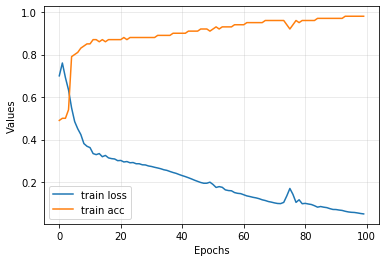

In [36]:
plt.figure()
plt.plot(loss_hist, label = "train loss")
plt.plot(acc_hist ,label="train acc")
plt.legend()
plt.xlabel("Epochs")
plt.grid(alpha=0.3)
plt.ylabel("Values")